In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['savefig.dpi'] = 120

from scipy.stats import skew
from scipy.stats import kurtosis

In [2]:
tf=25
dt=0.01
N  = round(tf/dt)
t = np.arange(0,tf,dt)

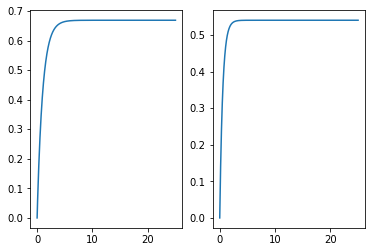

In [6]:
## M1 

#IC
eps=0.1
csi=0.1
I=1

#IFFL
x = np.zeros(N)
y = np.zeros(N)

trials=1
eps = np.random.uniform(low=10, high=100)
alpha  = np.random.uniform(low=0.1, high=1)
csi  = np.random.uniform(low=0.1, high=1)

for i in range(trials):
  for j in range(N-1):
    k1x = - x[j] -y[j] + I
    k1y = eps*(-y[j] + csi*I)
    ax = x[j] + dt*k1x
    ay = y[j] + dt*k1y
    k2x = - ax -ay + I
    k2y = eps*(-ay + csi*I)
    x[j+1] = x[j] + (dt/2)*(k1x + k2x)
    y[j+1] = y[j] + (dt/2)*(k1y + k2y)

plt.subplot(121)
plt.plot(t,x)

# eps=0.1
# alpha=1.0
# I=1.0

#NFBL
x = np.zeros(N)
y = np.zeros(N)

for i in range(trials):
  for j in range(N-1):
    x[j+1] = x[j] + dt*(- x[j] -y[j] + I)
    y[j+1] = y[j] + dt*(eps*(-y[j] + alpha*x[j]))

plt.subplot(122)
plt.plot(t,x)

In [43]:
alpha

0.8182741303620774

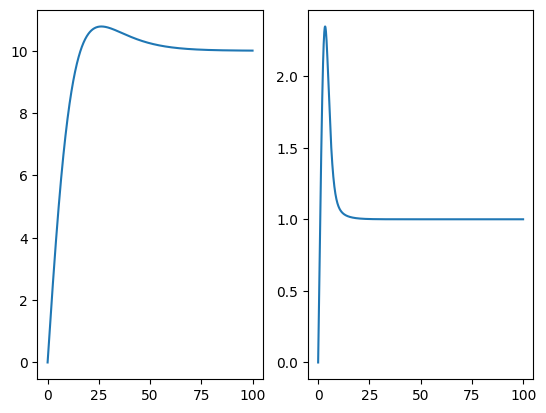

In [ ]:
## M2

#IC
eps=0.1
csi=0.1
I=1

#IFFL
x = np.zeros(N)
y = np.zeros(N)

for i in range(trials):
  for j in range(N-1):
    x[j+1] = x[j] + dt*(- x[j]*y[j] + I -x[i])
    y[j+1] = y[j] + dt*(eps*(-y[j] + csi*I))

plt.subplot(121)
plt.plot(t,x)

eps=0.1
alpha=1.0
I=1.0

#NFBL
x = np.zeros(N)
y = np.zeros(N)

for i in range(trials):
  for j in range(N-1):
    x[j+1] = x[j] + dt*(- x[j]*y[j] + I -x[i])
    y[j+1] = y[j] + dt*(eps*(-y[j] + alpha*x[j]))

plt.subplot(122)
plt.plot(t,x)

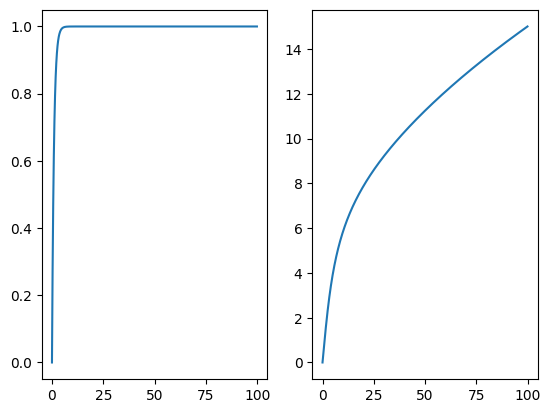

In [ ]:
## M3

K=1

#IC
eps=0.1
csi=0.1
I=1

#IFFL
x = np.zeros(N)
y = np.zeros(N)

for i in range(trials):
  for j in range(N-1):
    x[j+1] = x[j] + dt*(I / (K + y[i]) - x[j])
    y[j+1] = y[j] + dt*(eps*(-y[j] + csi*I))

plt.subplot(121)
plt.plot(t,x)

eps=0.1
alpha=1.0
I=1.0

#NFBL
x = np.zeros(N)
y = np.zeros(N)

for i in range(trials):
  for j in range(N-1):
    x[j+1] = x[j] + dt*( I / (K + y[j]) -x[i])
    y[j+1] = y[j] + dt*(eps*(-y[j] + alpha*x[j]))

plt.subplot(122)
plt.plot(t,x)

In [72]:
N

2500

### Generate dataset

# M1

In [53]:
I=1.0
trials=2000
lbs=[]
signal=[]
for i in range(trials):
  #IFFL
  x1 = np.zeros(N)
  y1 = np.zeros(N)
  #NFBL
  x2 = np.zeros(N)
  y2 = np.zeros(N)
#   eps = np.random.uniform(low=10e-2, high=10e-1)
#   alpha, csi = np.random.uniform(low=10e-2, high=10e-1, size=(2,))
  eps = np.random.uniform(low=10, high=100)
  alpha = np.random.uniform(low=0.1, high=1, size=(1,))
  csi = alpha
  for j in range(N-1):
    k1x = - x1[j] -y1[j] + I
    k1y = eps*(-y1[j] + csi*I)
    ax = x1[j] + dt*k1x
    ay = y1[j] + dt*k1y
    k2x = - ax -ay + I
    k2y = eps*(-ay + csi*I)
    x1[j+1] = x1[j] + (dt/2)*(k1x + k2x)
    y1[j+1] = y1[j] + (dt/2)*(k1y + k2y)
    xp=max(x1)
    x50=xp - (xp-x1[-1])/2
    try:
        id_ss = np.where((np.diff(x1)>-1e-4)==False)[0][-1]
    except:
        id_ss = np.where((np.diff(x1)>0)==False)[0][-1]
    signal.append([xp, t[np.argmax(x1)], x1[id_ss], t[id_ss], x50, t[x1>x50][-1]])
    lbs.append(0)

    x2[j+1] = x2[j] + dt*(- x2[j] -y2[j] + I)
    y2[j+1] = y2[j] + dt*(eps*(-y2[j] + alpha*x2[j]))
    xp=max(x2)
    x50=xp - (xp-x2[-1])/2
    id_ss = np.where((np.diff(x2)>-1e-4)==False)[0][-1]
    signal.append([xp, t[np.argmax(x2)], x2[id_ss], t[id_ss], x50, t[x2>x50][-1]])
    lbs.append(1)

np.savetxt("M1_R1_signal.dat",signal)
np.savetxt("M1_R1_lbs.dat",lbs)

IndexError: index -1 is out of bounds for axis 0 with size 0

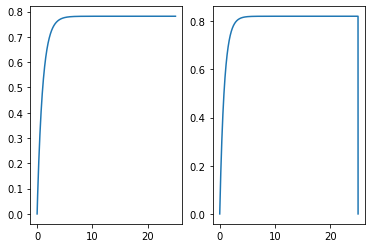

In [51]:
plt.subplot(121)
plt.plot(t,x1)
# id_ss = np.where((np.diff(x1)>-1e-4)==False)[0][-1]
# plt.plot(t[id_ss],x1[id_ss],'x')
plt.subplot(122)
plt.plot(t,x2)
# id_ss = np.where((np.diff(x2)>-1e-4)==False)[0][-1]
# plt.plot(t[id_ss],x2[id_ss],'x')

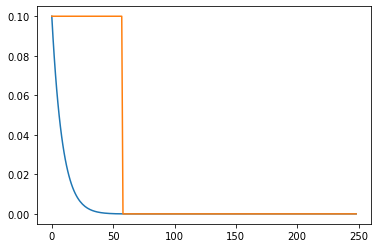

In [138]:
plt.plot(np.diff(x1))
plt.plot((np.diff(x1)>0)*0.1)

In [116]:
np.where((np.diff(x1)>-1e-3)==False)[0][-1]

70

In [134]:
np.diff(x1)>-1e-3

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

# M2

In [136]:
I=1.0
trials=200
lbs=[]
signal=[]
for i in range(trials):
  #IFFL
  x1 = np.zeros(N)
  y1 = np.zeros(N)
  #NFBL
  x2 = np.zeros(N)
  y2 = np.zeros(N)
#   eps = np.random.uniform(low=10e-2, high=10e-1)
  alpha, csi = np.random.uniform(low=10e-1, high=10e-0, size=(2,))
  eps = np.random.uniform(low=10e-3, high=10e-2)
#   alpha, csi = np.random.uniform(low=0.1, high=1, size=(2,))  
  for j in range(N-1):
    x1[j+1] = x1[j] + dt*(- x1[j]*y1[j] + I -x1[j])
    y1[j+1] = y1[j] + dt*(eps*(-y1[j] + csi*I))
    xp=max(x1)
    x50=xp - (xp-x1[-1])/2
    try:
        id_ss = np.where((np.diff(x1)>-1e-6)==False)[0][-1]
    except:
        id_ss = np.where((np.diff(x1)>0)==False)[0][-1]
    signal.append([xp, t[np.argmax(x1)], x1[id_ss], t[id_ss], x50, t[x1>x50][-1]])
    lbs.append(0)

    x2[j+1] = x2[j] + dt*(- x2[j]*y2[j] + I -x2[i])
    y2[j+1] = y2[j] + dt*(eps*(-y2[j] + alpha*x2[j]))
    xp=max(x2)
    x50=xp - (xp-x2[-1])/2
    id_ss = np.where((np.diff(x2)>-1e-6)==False)[0][-1]
    signal.append([xp, t[np.argmax(x2)], x2[id_ss], t[id_ss], x50, t[x2>x50][-1]])
    lbs.append(1)

np.savetxt("M2_R1_signal.dat",signal)
np.savetxt("M2_R1_lbs.dat",lbs)

/scratch/ipykernel_20613/3549022897.py:28: RuntimeWarning: overflow encountered in double_scalars
  x2[j+1] = x2[j] + dt*(- x2[j]*y2[j] + I -x2[i])
/opt/site/easybuild/software/Anaconda3/2022.05/lib/python3.9/site-packages/numpy/lib/function_base.py:1292: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])
/scratch/ipykernel_20613/3549022897.py:29: RuntimeWarning: invalid value encountered in double_scalars
  y2[j+1] = y2[j] + dt*(eps*(-y2[j] + alpha*x2[j]))


IndexError: index -1 is out of bounds for axis 0 with size 0

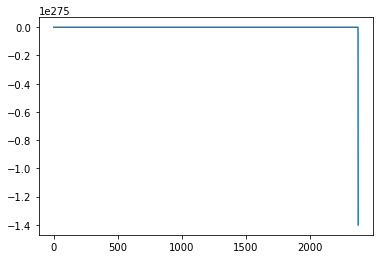

In [137]:
plt.plot(x2)

IndexError: index -1 is out of bounds for axis 0 with size 0

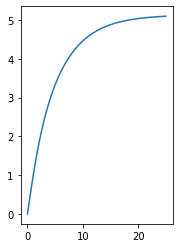

In [60]:
plt.subplot(121)
plt.plot(t,x1)
id_ss = np.where((np.diff(x1)>-1e-4)==False)[0][-1]
plt.plot(t[id_ss],x1[id_ss],'x')
plt.subplot(122)
plt.plot(t,x2)
id_ss = np.where((np.diff(x2)>-1e-4)==False)[0][-1]
plt.plot(t[id_ss],x2[id_ss],'x')

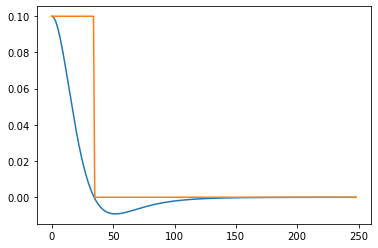

In [144]:
plt.plot(np.diff(x1))
plt.plot((np.diff(x1)>0)*0.1)

# M non linear


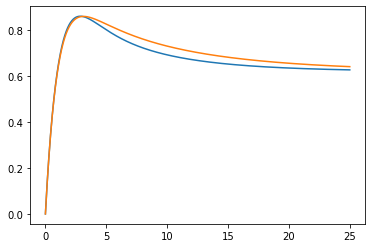

In [16]:
k1 = 1;
k2 = 1;
k3 = 0.1;
k4 = 0.1;
sgma = 0;
A = 1;

x = np.zeros(N)
y = np.zeros(N)

#NBFL-1
for j in range(N-1):
  k1x = -k1*x[j]-k2*y[j]*x[j]+A;
  k1y = k3*x[j]-k4*y[j]+sgma*A;
  ax = x[j]+k1x*dt;
  ay = y[j]+k1y*dt;
  k2x = -k1*ax-k2*ay*ax+A;
  k2y = k3*ax-k4*ay+sgma*A;
  x[j+1] = x[j]+(k1x+k2x)*dt/2;
  y[j+1] = y[j]+(k1y+k2y)*dt/2;

plt.figure()
plt.plot(t,x)
#     figure(3)
#     hold on
#     plot(t,x,'-b','linewidth',2);
#     axis([0 Tmax -0.1 2]);
#     xlabel('t');
#     ylabel('x');
#     set(gca,'fontsize',24);
    
#xbar = roots([ k2*k3 k1*k4+k2*sgma*A -k4*A]);
if k3 > 0:
  xbar = (-(k1*k4+k2*sgma*A)+np.sqrt((k1*k4+k2*sgma*A)**2+4*k2*k3*k4*A))/(2*k2*k4)

    
K1 = k1;
K3 = 0;
K4 = k4*k1/K1;
K2 = k2;
sgma = (K4*A/xbar-K1*K4)/(K2*A);
    
#IFFL-1

x = np.zeros(N)
y = np.zeros(N)

for j in range(N-1):
  k1x = -K1*x[j]-K2*y[j]*x[j]+A;
  k1y = K3*x[j]-K4*y[j]+sgma*A;
  ax = x[j]+k1x*dt;
  ay = y[j]+k1y*dt;
  k2x = -K1*ax-K2*ay*ax+A;
  k2y = K3*ax-K4*ay+sgma*A;
  x[j+1] = x[j]+(k1x+k2x)*dt/2;
  y[j+1] = y[j]+(k1y+k2y)*dt/2;

plt.plot(t,x)   
#     figure(3)
#     plot(t,x,'--r','linewidth',2);
    
    

# Dataset

In [4]:
# NBFL-1 vs IFFL-1
D=1e-3 #noise
trials=2000
lbs=[]
signal=[]
for i in range(trials):

#     k1 = 1;
#     k2 = 1;
#     k3 = 0.1;
#     k4 = 0.1;
    k1,k2 = np.random.uniform(low=0.9, high=1.1, size=(2,))
    k3,k4 = np.random.uniform(low=0.09, high=0.11, size=(2,))
    sgma = 0;
    A = 1;

    x = np.zeros(N)
    y = np.zeros(N)

    #NBFL-1
    for j in range(N-1):
      k1x = -k1*x[j]-k2*y[j]*x[j]+A;
      k1y = k3*x[j]-k4*y[j]+sgma*A;
      ax = x[j]+k1x*dt;
      ay = y[j]+k1y*dt;
      k2x = -k1*ax-k2*ay*ax+A;
      k2y = k3*ax-k4*ay+sgma*A;
      x[j+1] = x[j]+(k1x+k2x)*dt/2;
      x[j+1] += np.sqrt(2*D*dt)*np.random.normal(loc=0.0, scale=1.0);
      y[j+1] = y[j]+(k1y+k2y)*dt/2;
        
    xp=max(x)
    x50=xp - (xp-x[-1])/2
    try:
        id_ss = np.where((np.diff(x)>-1e-4)==False)[0][-1]
    except:
        id_ss = np.where((np.diff(x)>0)==False)[0][-1]
        
#     signal.append([xp, t[np.argmax(x)], x[id_ss], t[id_ss], x50, t[x>x50][-1]])
#     signal.append([xp, t[np.argmax(x)], x[id_ss], t[id_ss], x50, t[x>x50][-1], y[2000]])
    signal.append([xp, t[np.argmax(x)], x[id_ss], t[id_ss], x50, t[x>x50][-1], np.var(x), skew(x), kurtosis(x)])
    lbs.append(0)

    #xbar = roots([ k2*k3 k1*k4+k2*sgma*A -k4*A]);
    if k3 > 0:
      xbar = (-(k1*k4+k2*sgma*A)+np.sqrt((k1*k4+k2*sgma*A)**2+4*k2*k3*k4*A))/(2*k2*k4)

    K1 = k1;
    K3 = 0;
    K4 = k4*k1/K1;
    K2 = k2;
    sgma = (K4*A/xbar-K1*K4)/(K2*A);
#     plt.figure(1)
#     plt.subplot(121)
#     plt.plot(t,x,'k')
#     plt.subplot(122)
#     plt.plot(t,y,'k')

    #IFFL-1
    x = np.zeros(N)
    y = np.zeros(N)

    for j in range(N-1):
      k1x = -K1*x[j]-K2*y[j]*x[j]+A;
      k1y = K3*x[j]-K4*y[j]+sgma*A;
      ax = x[j]+k1x*dt;
      ay = y[j]+k1y*dt;
      k2x = -K1*ax-K2*ay*ax+A;
      k2y = K3*ax-K4*ay+sgma*A;
      x[j+1] = x[j]+(k1x+k2x)*dt/2;
      x[j+1] += np.sqrt(2*D*dt)*np.random.normal(loc=0.0, scale=1.0); 
      y[j+1] = y[j]+(k1y+k2y)*dt/2;
        
    xp=max(x)
    x50=xp - (xp-x[-1])/2
    try:
        id_ss = np.where((np.diff(x)>-1e-4)==False)[0][-1]
    except:
        id_ss = np.where((np.diff(x)>0)==False)[0][-1]
         
#     signal.append([xp, t[np.argmax(x)], x[id_ss], t[id_ss], x50, t[x>x50][-1]])
#     signal.append([xp, t[np.argmax(x)], x[id_ss], t[id_ss], x50, t[x>x50][-1], y[2000]])
    signal.append([xp, t[np.argmax(x)], x[id_ss], t[id_ss], x50, t[x>x50][-1], np.var(x), skew(x), kurtosis(x)])

    lbs.append(1)
#     plt.figure(1)
#     plt.subplot(121)
#     plt.plot(t,x,'r--')
#     plt.subplot(122)
#     plt.plot(t,y,'r--')

# np.savetxt("nl_signal.dat",signal)
# np.savetxt("nl_lbs.dat",lbs)

# np.savetxt("nl_signal_y.dat",signal)
# np.savetxt("nl_lbs_y.dat",lbs)

np.savetxt("nl_signal_vars.dat",signal)
np.savetxt("nl_lbs_vars.dat",lbs)

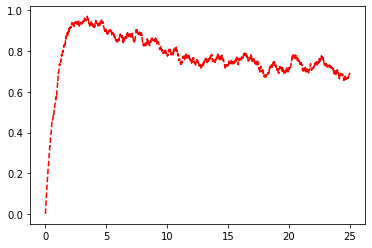

In [61]:
plt.plot(t,x,'r--')

In [5]:
# NBFL-1 vs NBFL-2
D=1e-3 #noise
trials=2000
lbs=[]
signal=[]
for i in range(trials):

#     k1 = 1;
#     k2 = 1;
#     k3 = 0.1;
#     k4 = 0.1;
    k1,k2 = np.random.uniform(low=0.8, high=1.3, size=(2,))
    k3,k4 = np.random.uniform(low=0.08, high=0.13, size=(2,))
    sgma = 0;
    A = 1;

    x = np.zeros(N)
    y = np.zeros(N)

    #NBFL-1
    for j in range(N-1):
      k1x = -k1*x[j]-k2*y[j]*x[j]+A;
      k1y = k3*x[j]-k4*y[j]+sgma*A;
      ax = x[j]+k1x*dt;
      ay = y[j]+k1y*dt;
      k2x = -k1*ax-k2*ay*ax+A;
      k2y = k3*ax-k4*ay+sgma*A;
      x[j+1] = x[j]+(k1x+k2x)*dt/2;
      x[j+1] += np.sqrt(2*D*dt)*np.random.normal(loc=0.0, scale=1.0);   
      y[j+1] = y[j]+(k1y+k2y)*dt/2;
        
    xp=max(x)
    x50=xp - (xp-x[-1])/2
    try:
        id_ss = np.where((np.diff(x)>-1e-4)==False)[0][-1]
    except:
        id_ss = np.where((np.diff(x)>0)==False)[0][-1]
        
#     signal.append([xp, t[np.argmax(x)], x[id_ss], t[id_ss], x50, t[x>x50][-1]])
#     signal.append([xp, t[np.argmax(x)], x[id_ss], t[id_ss], x50, t[x>x50][-1], y[2000]])
    signal.append([xp, t[np.argmax(x)], x[id_ss], t[id_ss], x50, t[x>x50][-1], np.var(x), skew(x), kurtosis(x)])

    lbs.append(0)

    #xbar = roots([ k2*k3 k1*k4+k2*sgma*A -k4*A]);
    
#     plt.figure(1)
#     plt.subplot(121)
#     plt.plot(t,x,'k')
#     plt.subplot(122)
#     plt.plot(t,y,'k')

    #NBFL-2
    
    k_1 = k1;
    k_2 = 0.5;
    k_3 = k2*k3/k_2;
    k_4 = k4;
    
    x = np.zeros(N)
    y = np.zeros(N)

    for j in range(N-1):
      k1x = -k_1*x[j]-k_2*y[j]*x[j]+A;
      k1y = k_3*x[j]-k_4*y[j]+sgma*A;
      ax = x[j]+k1x*dt;
      ay = y[j]+k1y*dt;
      k2x = -k_1*ax-k_2*ay*ax+A;
      k2y = k_3*ax-k_4*ay+sgma*A;
      x[j+1] = x[j]+(k1x+k2x)*dt/2;
      x[j+1] += np.sqrt(2*D*dt)*np.random.normal(loc=0.0, scale=1.0);   
      y[j+1] = y[j]+(k1y+k2y)*dt/2;
        
    xp=max(x)
    x50=xp - (xp-x[-1])/2
    try:
        id_ss = np.where((np.diff(x)>-1e-4)==False)[0][-1]
    except:
        id_ss = np.where((np.diff(x)>0)==False)[0][-1]
        
#     signal.append([xp, t[np.argmax(x)], x[id_ss], t[id_ss], x50, t[x>x50][-1]])
#     signal.append([xp, t[np.argmax(x)], x[id_ss], t[id_ss], x50, t[x>x50][-1], y[2000]])
    signal.append([xp, t[np.argmax(x)], x[id_ss], t[id_ss], x50, t[x>x50][-1], np.var(x), skew(x), kurtosis(x)])

    lbs.append(1)
#     plt.figure(1)
#     plt.subplot(121)
#     plt.plot(t,x,'r--')
#     plt.subplot(122)
#     plt.plot(t,y,'r--')

# np.savetxt("nfbl_vs_nfbl_signal.dat",signal)
# np.savetxt("nfbl_vs_nfbl_lbs.dat",lbs)

# np.savetxt("nfbl_vs_nfbl_signal_y.dat",signal)
# np.savetxt("nfbl_vs_nfbl_lbs_y.dat",lbs)

np.savetxt("nfbl_vs_nfbl_signal_vars.dat",signal)
np.savetxt("nfbl_vs_nfbl_lbs_vars.dat",lbs)

In [6]:
# IFFL-1 vs IFFL-2
D=1e-3 #noise
trials=2000
lbs=[]
signal=[]
for i in range(trials):

    K1,K2 = np.random.uniform(low=0.3, high=0.7, size=(2,))
    K3 = 0;
    K4 = np.random.uniform(low=0.08, high=0.13, size=(1,))
    sgma = 0.05;
    A = 1;

    x = np.zeros(N)
    y = np.zeros(N)

    #IFFL-1
    for j in range(N-1):
      k1x = -K1*x[j]-K2*y[j]*x[j]+A;
      k1y = K3*x[j]-K4*y[j]+sgma*A;
      ax = x[j]+k1x*dt;
      ay = y[j]+k1y*dt;
      k2x = -K1*ax-K2*ay*ax+A;
      k2y = K3*ax-K4*ay+sgma*A;
      x[j+1] = x[j]+(k1x+k2x)*dt/2;
      x[j+1] += np.sqrt(2*D*dt)*np.random.normal(loc=0.0, scale=1.0);  
      y[j+1] = y[j]+(k1y+k2y)*dt/2;
        
    xp=max(x)
    x50=xp - (xp-x[-1])/2
    try:
        id_ss = np.where((np.diff(x)>-1e-4)==False)[0][-1]
    except:
        id_ss = np.where((np.diff(x)>0)==False)[0][-1]
        
#     signal.append([xp, t[np.argmax(x)], x[id_ss], t[id_ss], x50, t[x>x50][-1]])
#     signal.append([xp, t[np.argmax(x)], x[id_ss], t[id_ss], x50, t[x>x50][-1], y[2000]])
    signal.append([xp, t[np.argmax(x)], x[id_ss], t[id_ss], x50, t[x>x50][-1], np.var(x), skew(x), kurtosis(x)])

    lbs.append(0)

    #xbar = roots([ k2*k3 k1*k4+k2*sgma*A -k4*A]);
    
#     plt.figure(1)
#     plt.subplot(121)
#     plt.plot(t,x,'k')
#     plt.ylim([0,2])
#     plt.subplot(122)
#     plt.plot(t,y,'k')

    #IFFL-2
    
    K_1 = K1;
    K_2 = 1.0;
    K_3 = K3;
    K_4 = K4;
    sgma_ = K2*sgma/K_2;
    
    x = np.zeros(N)
    y = np.zeros(N)

    for j in range(N-1):
      k1x = -K_1*x[j]-K_2*y[j]*x[j]+A;
      k1y = K_3*x[j]-K_4*y[j]+sgma_*A;
      ax = x[j]+k1x*dt;
      ay = y[j]+k1y*dt;
      k2x = -K_1*ax-K_2*ay*ax+A;
      k2y = K_3*ax-K_4*ay+sgma_*A;
      x[j+1] = x[j]+(k1x+k2x)*dt/2;
      x[j+1] += np.sqrt(2*D*dt)*np.random.normal(loc=0.0, scale=1.0);   
      y[j+1] = y[j]+(k1y+k2y)*dt/2;
        
    xp=max(x)
    x50=xp - (xp-x[-1])/2
    try:
        id_ss = np.where((np.diff(x)>-1e-4)==False)[0][-1]
    except:
        id_ss = np.where((np.diff(x)>0)==False)[0][-1]
        
#     signal.append([xp, t[np.argmax(x)], x[id_ss], t[id_ss], x50, t[x>x50][-1]])
#     signal.append([xp, t[np.argmax(x)], x[id_ss], t[id_ss], x50, t[x>x50][-1], y[2000]])
    signal.append([xp, t[np.argmax(x)], x[id_ss], t[id_ss], x50, t[x>x50][-1], np.var(x), skew(x), kurtosis(x)])

    lbs.append(1)
#     plt.figure(1)
#     plt.subplot(121)
#     plt.plot(t,x,'r--')
#     plt.ylim([0,2])
#     plt.subplot(122)
#     plt.plot(t,y,'r--')

# np.savetxt("iffl_vs_iffl_signal.dat",signal)
# np.savetxt("iffl_vs_iffl_lbs.dat",lbs)

# np.savetxt("iffl_vs_iffl_signal_y.dat",signal)
# np.savetxt("iffl_vs_iffl_lbs_y.dat",lbs)

np.savetxt("iffl_vs_iffl_signal_vars.dat",signal)
np.savetxt("iffl_vs_iffl_lbs_vars.dat",lbs)

0.3201037696522492

(0.0, 2.0)

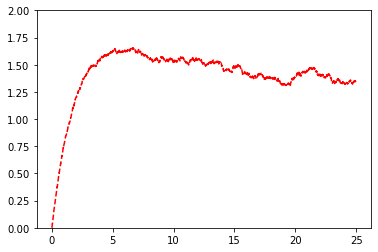

In [58]:
plt.plot(t,x,'r--')
plt.ylim([0,2])